<h1><b>Problem 1</b></h1>

Name : Swapnanil Halder
Roll No. : 18MA20046

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
mf=loadmat('./annualrainfall.mat')

In [3]:
df=pd.DataFrame(mf['XR'])
df.shape

(357, 118)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0.719022,2.572195,5.115582,0.509786,0.600234,4.217397,3.394793,2.776336,5.246690,2.870923,...,6.960845,6.511054,4.486057,3.190908,2.053494,1.366868,2.746204,2.418939,3.602588,0.274935
1,0.799972,2.358573,4.459389,0.649587,1.078375,4.126520,3.245645,2.841028,4.584479,2.771173,...,6.964754,6.462295,3.483775,3.183151,1.549078,1.186168,2.879098,2.404098,2.857377,0.133504
2,1.116379,3.817571,5.715812,1.357004,1.584306,5.746037,4.469713,5.190642,5.284658,5.268513,...,9.766168,11.539829,8.832029,3.230743,8.255847,6.823443,3.584699,4.593279,5.954699,3.754372
3,0.764488,2.544322,5.017730,0.584740,0.753628,4.234103,3.381529,2.851782,5.033902,2.984910,...,6.457876,11.260778,6.178331,3.098858,6.437519,4.277422,2.883681,3.478614,4.827943,1.997839
4,0.923383,1.777028,3.644102,0.878721,1.811034,4.045972,2.986376,2.789276,3.136766,2.756919,...,5.887419,6.470082,4.987229,2.611656,4.039705,2.206164,4.158557,2.259016,3.436328,0.772230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,11.667012,10.112830,8.772028,9.474487,10.539118,9.743111,9.810959,7.989961,6.714614,11.071616,...,13.227870,15.360656,15.649163,2.618579,11.375820,10.714026,11.514526,12.326776,12.507195,6.993124
353,12.174392,10.391051,8.985728,9.726133,10.844063,9.891584,10.043453,8.160284,6.768865,11.316049,...,8.818579,10.239891,15.649180,0.748165,7.282279,8.934231,10.578962,15.889617,16.111749,9.299454
354,12.512038,10.737137,9.214482,9.926839,11.189535,10.131405,10.281626,8.343368,6.960496,11.575127,...,0.000000,0.000000,15.649180,0.000000,2.533607,2.478074,3.314754,13.483197,13.549385,7.486578
355,10.399852,9.187904,8.054785,8.654893,9.524974,9.148661,9.014105,7.378704,6.438608,10.206582,...,0.000000,0.000000,0.000000,0.000000,11.677049,10.736066,11.473770,11.768852,11.990656,6.316393


In [5]:
tt=[]
for i in range(0,118):
  tt.append(np.sum(np.array(df[i])))
tt=np.array(tt)
mn=np.mean(tt)
std=np.std(tt)
print(mn)
print(std)


2731.5638988707724
266.89890593445193


In [6]:
yt=[]
for i in range(0,118):
  if(tt[i]>mn+std):
    yt.append(1)
  elif(tt[i]<mn-std):
    yt.append(-1)
  else:
    yt.append(0)
yt=np.array(yt)
print(len(yt))
print(yt)


118
[-1  0  0 -1 -1  0  0  0  0  0 -1  0 -1  0 -1  1  1 -1  0  0  1  1  0  1
  0  0  0  0  0  0  0  0  1  1  0  1  0  1  0  0  0  1  0  0  0  0  0  1
  1  0 -1 -1  0  0  0  0  0  1  1  0  1  0  0  1 -1  0  0 -1  0  1  0 -1
  0  0  1  0  0  0 -1  0  0 -1  1  0  0 -1 -1  1  0  0  0  0  0  0  0  0
  0  0  0 -1  0 -1  0  0  0 -1  0  0 -1  0  0  0  0 -1 -1  0  0 -1]


In [7]:
X=df.T
X=np.array(X)
yt=yt.reshape(-1,1)
print(X.shape)
print(yt.shape)

(118, 357)
(118, 1)


In [8]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
x_train=X[0:100]
y_train=yt[0:100]
x_test=X[100:]
y_test=yt[100:]
y_train=np.array(y_train)
y_test=np.array(y_test)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(100, 357)
(100, 1)
(18, 357)
(18, 1)


In [9]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.5555555555555556

In [10]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
rdmfclf.fit(x_train, y_train)
y_pred=rdmfclf.predict(x_test)
accuracy_score(y_test, y_pred)

/opt/homebrew/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7222222222222222

<H4><b>The results improved using random forest with same depth as decision tree model but the accuarcy is still low</b></h4>

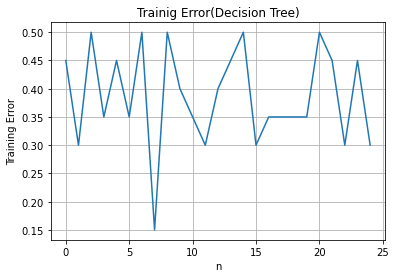

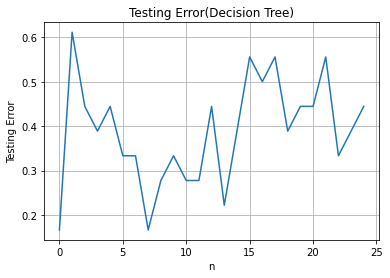

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train,y_train):
  clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
  clf.fit(x_train[ti], y_train[ti])
  y_pred=clf.predict(x_train[tsi])
  scorestr.append(accuracy_score(y_train[tsi], y_pred))
  y_pred=clf.predict(x_test)
  scorests.append(accuracy_score(y_test, y_pred))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Decision Tree)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Decision Tree)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

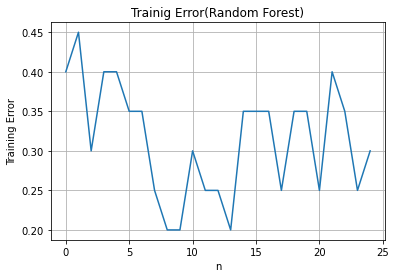

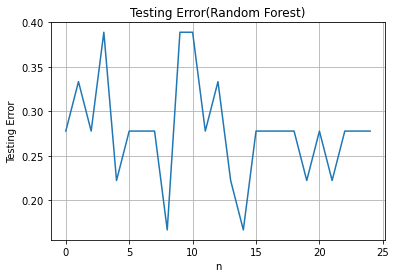

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
y_test=list(y_test)
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train,y_train):
  rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
  rdmfclf.fit(x_train[ti], y_train[ti].reshape(len(ti),))
  y_pred=rdmfclf.predict(x_train[tsi])
  scorestr.append(accuracy_score(y_train[tsi], y_pred))
  y_pred=rdmfclf.predict(x_test)
  scorests.append(accuracy_score(y_test, y_pred))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

In [13]:
df2=pd.DataFrame(X)
df2

,0,1,2,3,4,5,6,7,8,9,...,347,348,349,350,351,352,353,354,355,356
0,0.719022,0.799972,1.116379,0.764488,0.923383,0.961330,0.558784,1.043538,2.035055,2.412407,...,13.020404,12.291794,12.565416,12.688719,12.852414,11.667012,12.174392,12.512038,10.399852,11.287784
1,2.572195,2.358573,3.817571,2.544322,1.777028,1.908791,0.716344,3.693454,6.151360,4.426207,...,11.486169,10.682952,10.680328,10.680328,11.080315,10.112830,10.391051,10.737137,9.187904,9.791919
2,5.115582,4.459389,5.715812,5.017730,3.644102,3.152490,1.511983,5.075399,7.259941,4.552429,...,9.685181,9.213934,9.213934,9.213934,9.445984,8.772028,8.985728,9.214482,8.054785,8.523733
3,0.509786,0.649587,1.357004,0.584740,0.878721,0.927881,0.002060,1.601084,2.431932,2.139452,...,10.281640,9.984426,9.984426,9.977869,10.129921,9.474487,9.726133,9.926839,8.654893,9.182062
4,0.600234,1.078375,1.584306,0.753628,1.811034,2.033962,0.332660,1.851805,3.144972,3.733844,...,11.919070,11.156557,11.156557,11.156557,11.543451,10.539118,10.844063,11.189535,9.524974,10.185022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1.366868,1.186168,6.823443,4.277422,2.206164,1.589344,0.461699,8.090047,6.431803,3.793574,...,19.492623,9.588069,11.486510,15.202033,13.460845,10.714026,8.934231,2.478074,10.736066,6.441639
114,2.746204,2.879098,3.584699,2.883681,4.158557,4.041173,1.381222,5.195433,5.669377,4.716033,...,19.923025,10.453825,12.877425,18.285770,16.592371,11.514526,10.578962,3.314754,11.473770,6.884262
115,2.418939,2.404098,4.593279,3.478614,2.259016,2.398361,0.510432,6.964637,5.594689,3.659803,...,23.554620,10.161202,12.871311,22.713115,25.299874,12.326776,15.889617,13.483197,11.768852,7.061311
116,3.602588,2.857377,5.954699,4.827943,3.436328,3.296091,1.115723,7.842740,6.508164,6.648262,...,20.899627,9.562750,13.303825,23.052164,24.712736,12.507195,16.111749,13.549385,11.990656,7.194590


In [14]:
mn2=[]
std2=[]
for i in range(0,357):
  mean=np.mean(np.array(df2[i]))
  std=np.std(np.array(df2[i]))
  mn2.append(mean)
  std2.append(std)
print(mn2)
print(std2)


[2.879478463463494, 2.798380539571519, 4.678336546269584, 3.253127585465134, 2.86614660501283, 2.781171925813426, 1.014789979609927, 5.495714931877402, 6.854278138174216, 4.691441303757059, 3.066638583984233, 3.032655200493841, 1.9640573152470788, 1.3754962981718473, 1.1098625270174511, 1.097716307862206, 4.949258716625505, 4.513142145728291, 4.434803243935672, 4.214429004892388, 3.5787117962819663, 2.0676485815147334, 1.5513885511770558, 1.4303810487604904, 1.2669425925686564, 18.270223648587724, 16.27653886982014, 14.217112833668892, 6.663937785368113, 5.659682459174494, 5.366147863754425, 4.855361857638649, 2.77643994519049, 2.067958814237624, 1.656235635698744, 1.69111974123246, 1.4134268086969675, 2.5295833440155935, 21.001455423482973, 23.16731108439379, 26.76349123713807, 18.282041048947306, 21.369124835155652, 15.591643450968162, 9.46753022855668, 8.267111850508185, 6.172072998445741, 4.879956522050721, 4.257904265512979, 2.957228073572501, 2.1370024178963125, 1.752530584009501

In [15]:
yt2=[]
for i in range(0,357):
  y=[]
  for j in range(0,118):
    if(df2.iloc[j,i]>mn2[i]+std2[i]):
      y.append(1)
    elif (df2.iloc[j,i]<mn2[i]-std2[i]):
      y.append(-1)
    else :
      y.append(0)
  yt2.append(y)
yt2=np.array(yt2)
yt2.shape

(357, 118)

In [16]:
Xt2=[]
ytr2=[]
for i in range(0,357):
  for j in range(0,118):
    ytr2.append(yt2[i][j])
    x=[]
    for k in range(0,357):
      if(k!=i):x.append(yt2[k][j])
    Xt2.append(x)
Xt2=np.array(Xt2)
print(Xt2.shape)
ytr2=np.array(ytr2)
print(ytr2.shape)


(42126, 356)
(42126,)


In [17]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(Xt2, ytr2, test_size=0.25, stratify=ytr2)
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)



(31594, 356)
(31594,)
(10532, 356)
(10532,)


In [18]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
clf.fit(x_train2, y_train2)
y_pred2=clf.predict(x_test2)
accuracy_score(y_test2, y_pred2)

0.7184770224078997

In [19]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
rdmfclf.fit(x_train2, y_train2)
y_pred2=rdmfclf.predict(x_test2)
accuracy_score(y_test2, y_pred2)

0.7263577668059248

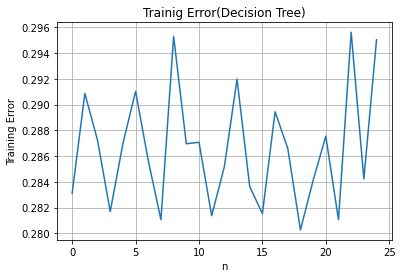

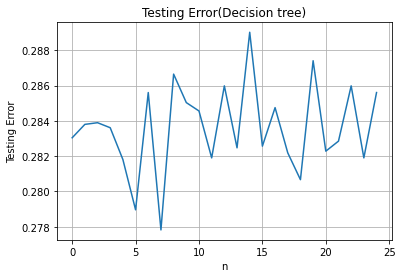

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train2,y_train2):
  clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
  clf.fit(x_train2[ti], y_train2[ti])
  y_pred2=clf.predict(x_train2[tsi])
  scorestr.append(accuracy_score(y_train2[tsi], y_pred2))
  y_pred2=clf.predict(x_test2)
  scorests.append(accuracy_score(y_test2, y_pred2))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Decision Tree)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Decision tree)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

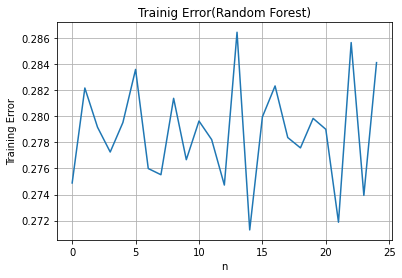

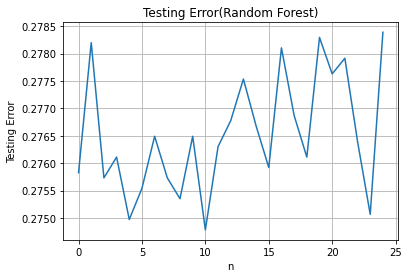

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train2,y_train2):
  rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
  rdmfclf.fit(x_train2[ti], y_train2[ti])
  y_pred2=rdmfclf.predict(x_train2[tsi])
  scorestr.append(accuracy_score(y_train2[tsi], y_pred2))
  y_pred2=rdmfclf.predict(x_test2)
  scorests.append(accuracy_score(y_test2, y_pred2))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

<h1><b>Problem 2</b></h1>

Name : Swapnanil Halder
Roll NO. : 18MA20046

In [22]:
import numpy as np
import pandas as pd
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [24]:
X.shape

(70000, 784)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [26]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [27]:
np.unique(y_test, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([1726, 1969, 1748, 1785, 1706, 1578, 1719, 1823, 1706, 1740]))

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=20,random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8818857142857143

In [30]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=50,random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8824571428571428

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
val = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=val, n_jobs=-1)

In [32]:
print(np.mean(scores))
print(np.std(scores))

0.8701428571428572
0.0031075943842694283


In [33]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
rdmfclf.fit(x_train, y_train)
y_pred=rdmfclf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9357714285714286

In [34]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
val = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
scores = cross_val_score(rdmfclf, X, y, scoring='accuracy', cv=val, n_jobs=-1)

In [35]:
print(np.mean(scores))
print(np.std(scores))

0.9373285714285716
0.002283078837795977
